In [ ]:
import sys
!python3 -V

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install --upgrade opencv-python
!{sys.executable} -m pip install pyqtwebengine==5.12.0
!{sys.executable} -m pip install pyqt5==5.12.0
!{sys.executable} -m pip install typed-ast==1.3.0
!{sys.executable} -m pip install --upgrade imageai --ignore-installed certifi
!{sys.executable} -m pip install keras==2.3.1
!{sys.executable} -m pip install tensorflow==2.2.0

**1) Bibliotecas:**

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
from imageai.Detection import ObjectDetection

In /Users/m04m_br/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/m04m_br/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/m04m_br/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/m04m_br/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/m04m_br/anaconda3/lib/python3.7/site-packa

**2) Função para extração de frames de videos:**

In [2]:
def extract_frames(video_path, fr=2):
    frames = []
    cap = cv2.VideoCapture(video_path)
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    id_frame = 0
    while id_frame<=total_frames:
        cap.set(1, id_frame)
        success, frame = cap.read()
        if type(frame) != type(None):
            frames.append(frame)
        id_frame+=fr
    return frames

**3) Extrair frames:**

In [3]:
frames = extract_frames('store_video.mp4')
len(frames)

642

**4) Apresentar um frame para validação:**

(-0.5, 1269.5, 719.5, -0.5)

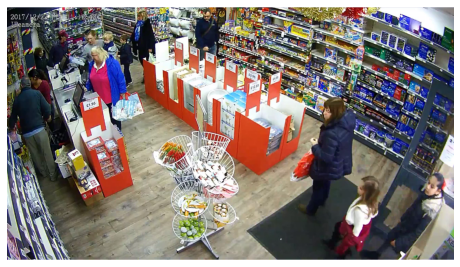

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGRA2RGB))
plt.axis('off')

**5) Iniciar o modelo yolo:**

In [5]:
detector = ObjectDetection()
detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath("yolo-tiny.h5")
detector.loadModel()
custom_objects = detector.CustomObjects(person=True)

**6) Reconhecimento de pessoa por frame:**

In [6]:
rect_h = 8
final_img = []
for img in tqdm(frames):

    detected_image_array, detections = detector.detectCustomObjectsFromImage(
        input_image=img, input_type="array", output_type="array",
        custom_objects=custom_objects, minimum_percentage_probability=75)
    
    new_img = np.zeros(img.shape)
    for person in detections:
        y_min = person['box_points'][1]
        x_min = person['box_points'][0]
        y_max =  person['box_points'][3]
        x_max =  person['box_points'][2]
        cv2.rectangle(new_img, (x_min,y_max-rect_h), (x_max,y_max), (0,255,0), -1)
        #cv2.line(new_img, (x_min,y_max-rect_h), (x_max,y_max), (0,255,0), 4)
        
    final_img.append(new_img[:,:,1]/255)

  0%|          | 0/642 [00:00<?, ?it/s]/Users/m04m_br/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 'detectCustomObjectsFromImage()' function has been deprecated and will be removed in future versions of ImageAI. 
 Kindly use 'detectObjectsFromImage()' 
  import sys
100%|██████████| 642/642 [1:12:45<00:00,  6.67s/it]


**7) Calculo de frequencias**

In [7]:
combi_img = np.sum(final_img, axis=0)
combi_img[combi_img.shape[0] - int(rect_h+rect_h/3):,:] = 0

**8) Mapa de frequencias (tracking)**

(-0.5, 1269.5, 719.5, -0.5)

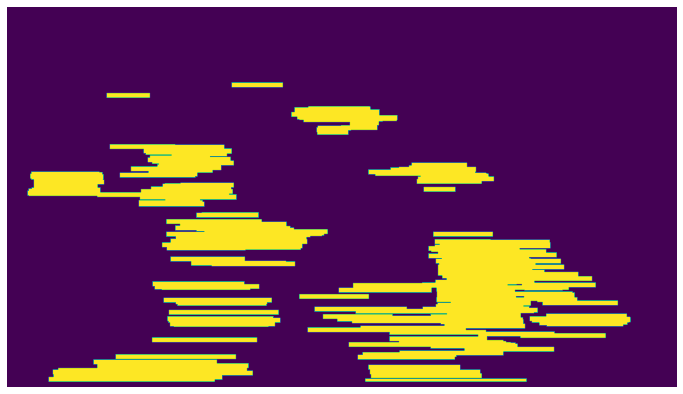

In [8]:
track_img = (combi_img != 0) +0 

plt.figure(figsize=(12,12))
plt.imshow(track_img)
plt.axis('off')

**9) Mapa heatmap**

(-0.5, 1269.5, 719.5, -0.5)

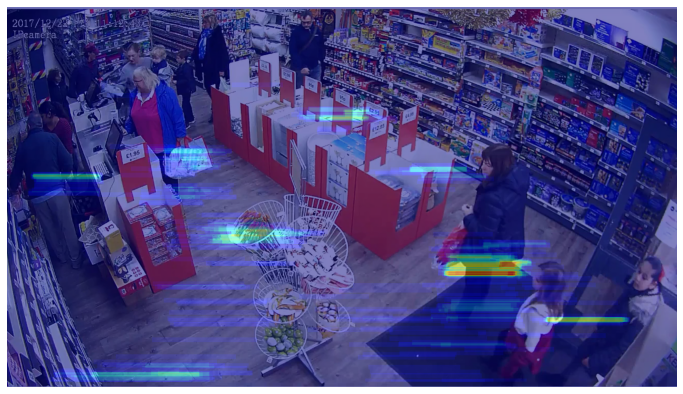

In [9]:
img_background = cv2.cvtColor(frames[0], cv2.COLOR_BGRA2RGB)

plt.figure(figsize=(12,12))
plt.imshow(img_background)
plt.imshow(combi_img, cmap='jet', alpha=0.5)
plt.axis('off')